In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./student_cgpa_iq_passfail_300.csv")
df.head(3)

,CGPA,IQ,Result
0,7.37,131,1
1,5.75,82,0
2,7.90,118,1


In [3]:
X = df[["CGPA", "IQ"]]
y = df["Result"]

In [5]:
y.head(3)

0    1
1    0
2    1
Name: Result, dtype: int64

In [6]:
X_norm = (X - X.min()) / (X.max() - X.min())

In [8]:
X_norm.head(3)

,CGPA,IQ
0,0.567434,0.824324
1,0.300987,0.162162
2,0.654605,0.648649


In [15]:
def perceptron(X, y, epoch=1000, lr=0.01):
    
    X=np.asarray(X, dtype=float)
    y=np.asarray(y, dtype=int)
    
    w = np.zeros(X.shape[1], dtype=float)
    b = 0.0
    
    for itr in range(epoch):
        for X_i, y_i in zip(X, y):
            y_pred = activation_step(X_i, w, b)
            error = y_i - y_pred
            
            w += lr * error * X_i
            b += lr * error
            
    return w, b           

In [18]:
def activation_step(x_i, w, b):
    return 1 if np.dot(x_i, w) + b >= 0 else 0 

In [20]:
w, b =perceptron(X_norm, y)

In [21]:
w, b

(array([0.04907895, 0.01391892]), np.float64(-0.03))

In [31]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    return (z >= 0).astype(int)

In [45]:
x_one = [7.37, 110]
x_norm = (x_one - X.min()) / (X.max() - X.min())
x_norm

CGPA    0.567434
IQ      0.540541
dtype: float64

In [46]:
pred = predict([x_norm], w, b)[0]
pred

np.int64(1)

In [36]:
def plot_perceptron_boundary(X, y, w, b, title="Perceptron predictions"):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=int)

    # predictions
    z = X @ w + b
    y_pred = (z >= 0).astype(int)
    wrong = (y_pred != y)

    # scatter: class 0 and class 1
    plt.figure(figsize=(6,4))
    plt.scatter(X[y==0, 0], X[y==0, 1], marker="o", label="Class 0")
    plt.scatter(X[y==1, 0], X[y==1, 1], marker="x", label="Class 1")

    # highlight wrong predictions
    if wrong.any():
        plt.scatter(X[wrong, 0], X[wrong, 1], facecolors="none", edgecolors="black",
                    s=120, linewidths=2, label="Wrong")

    # decision boundary: w0*x + w1*y + b = 0  =>  y = -(w0*x + b)/w1
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    xs = np.linspace(x_min, x_max, 200)

    if abs(w[1]) < 1e-12:
        # vertical line: w0*x + b = 0 -> x = -b/w0
        x0 = -b / w[0]
        plt.axvline(x0)
    else:
        ys = -(w[0]*xs + b) / w[1]
        plt.plot(xs, ys)

    plt.xlabel("Feature 1 (CGPA)")
    plt.ylabel("Feature 2 (IQ)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

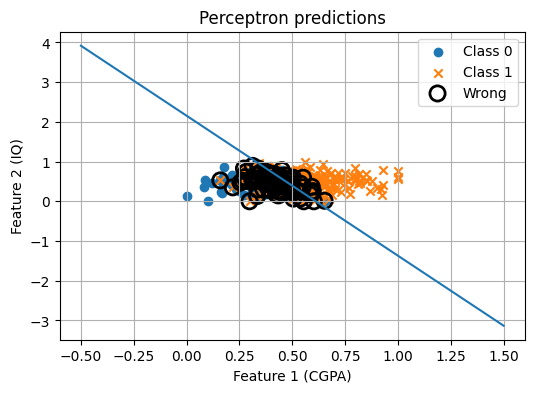

In [37]:
plot_perceptron_boundary(X_norm, y, w, b)